Example Notebook for using plotmapper
=====================================
plotmapper.py will replace and combine the functionality of JNBarcPlot.py, plottingTools.py, secondaryStructure.py, and shapemapperPlots.py using a unified class structure (Sample for a single MaP sample, Experiment for multiple samples). This will allow much higher level figure creation, but it is not quite yet ready.

Below are examples of the high level functions available for plotting a variety of MaP data.

Contents:
- [Notebook set-up](#notebook-set-up)
- [Initializing MaP sample](#initializing-map-sample)
- [High-level plotting functions](#high-level-plotting-functions)
- [ShapeMapper QC](#shapemapper-qc)
- [Classic ShapeMapper Plots](#classic-shapemapper-plots)
- [Skyline plots](#skyline-plots)
- [DANCE-MaP reactivity skyline](#dance-map-reactivity-skyline)
- [Arc Plots](#arc-plots)
- [Secondary Structure](#secondary-structure)

Notebook set-up
---------------

In [1]:
# This sets plots to display in-line by default
%matplotlib inline

# Import module, for high-level functions, no additional modules are needed
import plotmapper as MaP

# Creates an HTML button that hides/shows code cells
# Useful for lab notebook reports and research updates
MaP.create_code_button()

Initializing MaP sample
-----------------------
If you have consistently named files, (which you should), you can use a function to create a dictionary of keyword arguments (kwargs). Then, "unpack" the dictionary using the double asterisk.

In [2]:
path = 'data/'
def kwargs(sample):
    kwargs = {}
    kwargs["profile"] = path+sample+"_rnasep_profile.txt"
    kwargs["ctfile"] = path+"RNaseP.ct"
    kwargs["structure"] = path+"RC_CRYSTAL_STRUCTURE.xrna"
    kwargs["ringfile"] = path+sample+"-rnasep.corrs"
    kwargs["pairfile"] = path+sample+"-rnasep-pairmap.txt"
    kwargs["logfile"] = path+sample+"_shapemapper_log.txt"
    kwargs["dance_reactivities"] = path+sample+"_rnasep-reactivities.txt"
    return kwargs

example = MaP.Sample(sample="example", **kwargs("example"), structure_cassettes=True)
# equivalent to:
# example = MaP.Sample(sample="example",
#                      profile='data/example_rnasep_profile.txt',
#                      ctfile='data/RNaseP.ct',
#                      structure='data/RC_CRYSTAL_STRUCTURE.xrna',
#                      ringfile='data/example-rnasep.corrs',
#                      pairfile='data/exampleexample-rnasep-pairmap.txt',
#                      logfile='data/example_shapemapper_log.txt',
#                      dance_reactivities='data/example_rnasep-reactivities.txt',
#                      structure_cassettes=True)

Note: T nucleotides have been recoded as U


High-level plottting functions
------------------------------

ShapeMapper QC
--------------

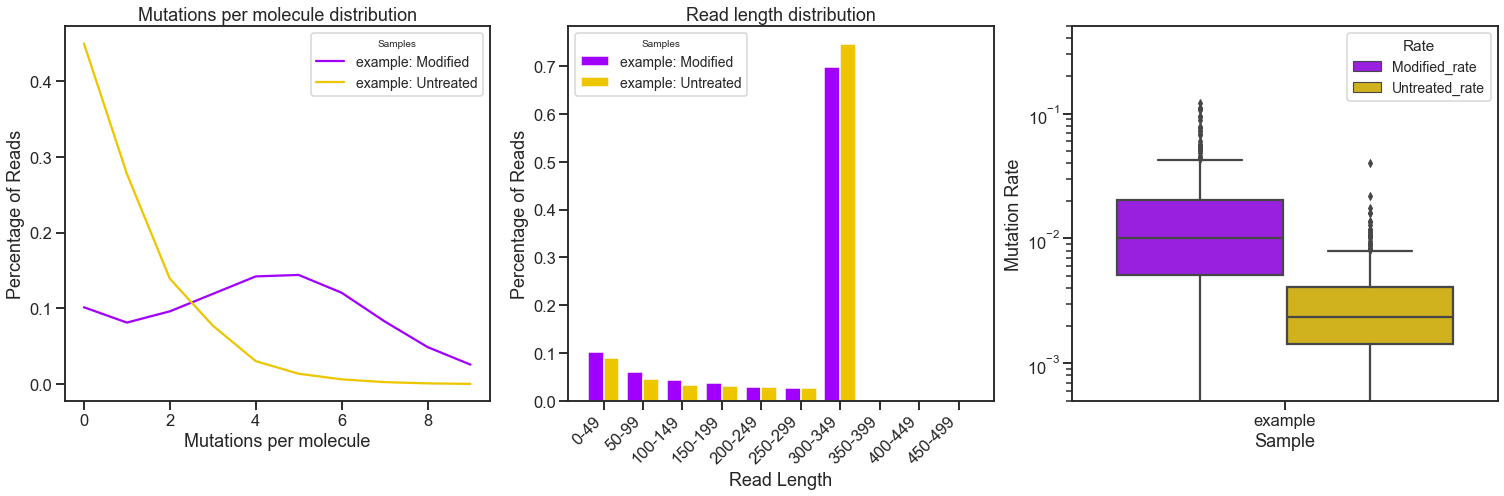

In [3]:
example.make_log_qc()


Classic ShapeMapper Plots
-------------------------

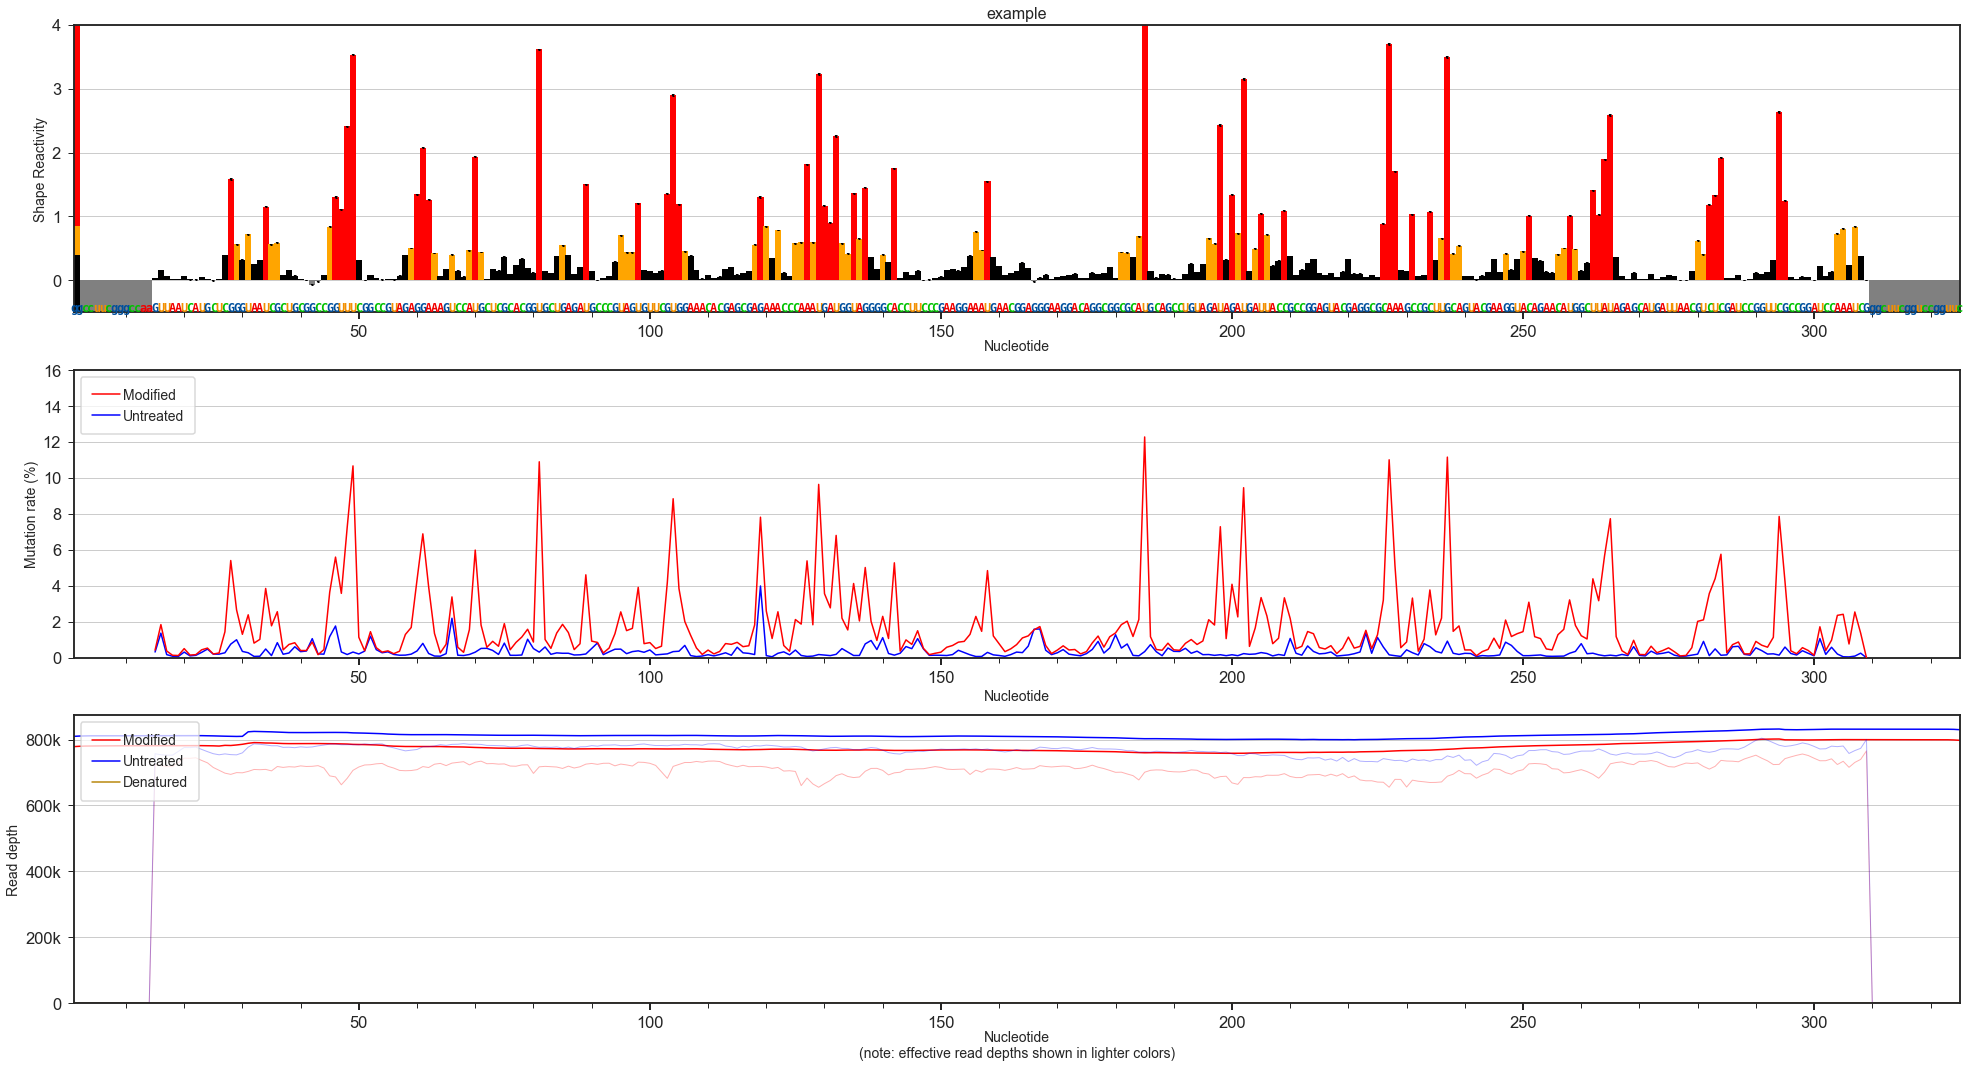

In [4]:
example.make_shapemapper()

Skyline Plots
-------------

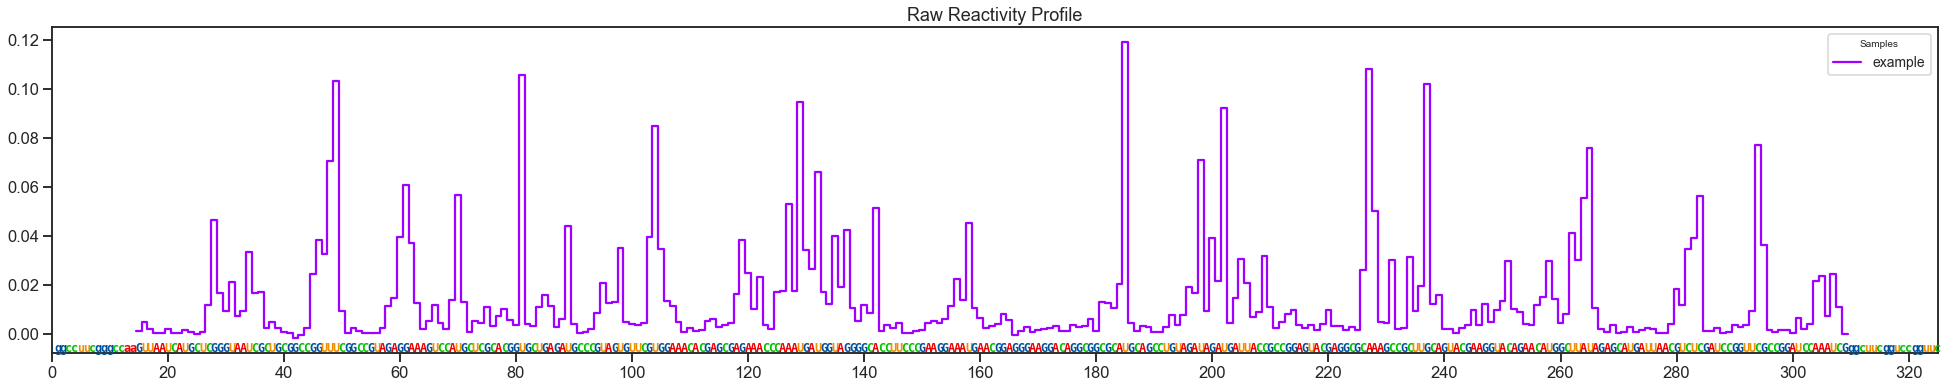

In [5]:
example.make_skyline()
# def make_skyline(self, column="Reactivity_profile"):
#         fig, ax = plt.subplots(1, figsize=self.get_skyline_figsize(1, 1))
#         self.plot_skyline(ax)
#         self.plot_sequence(ax)
#         ax.set(title="Raw Reactivity Profile",
#                xlim=[0, self.length],
#                xticks=range(0, self.length, 20))
#         ax.legend(title="Samples")

DANCE-MaP reactivities skyline
------------------------------

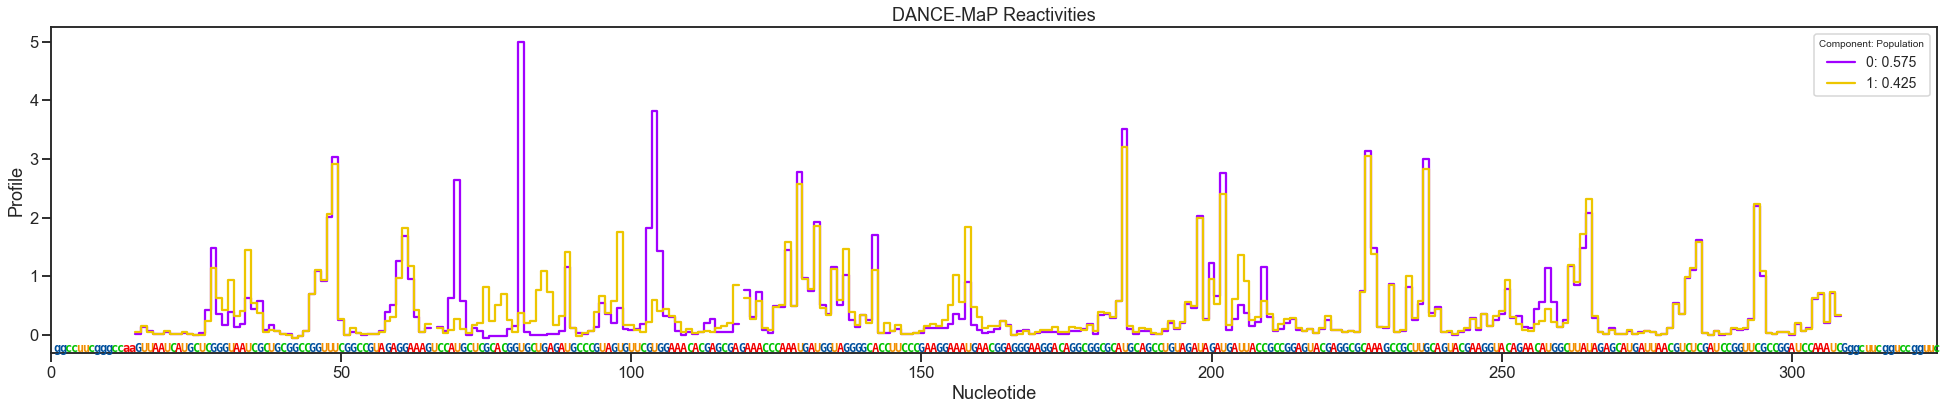

In [6]:
example.make_dance_skyline()

Arc Plots
---------

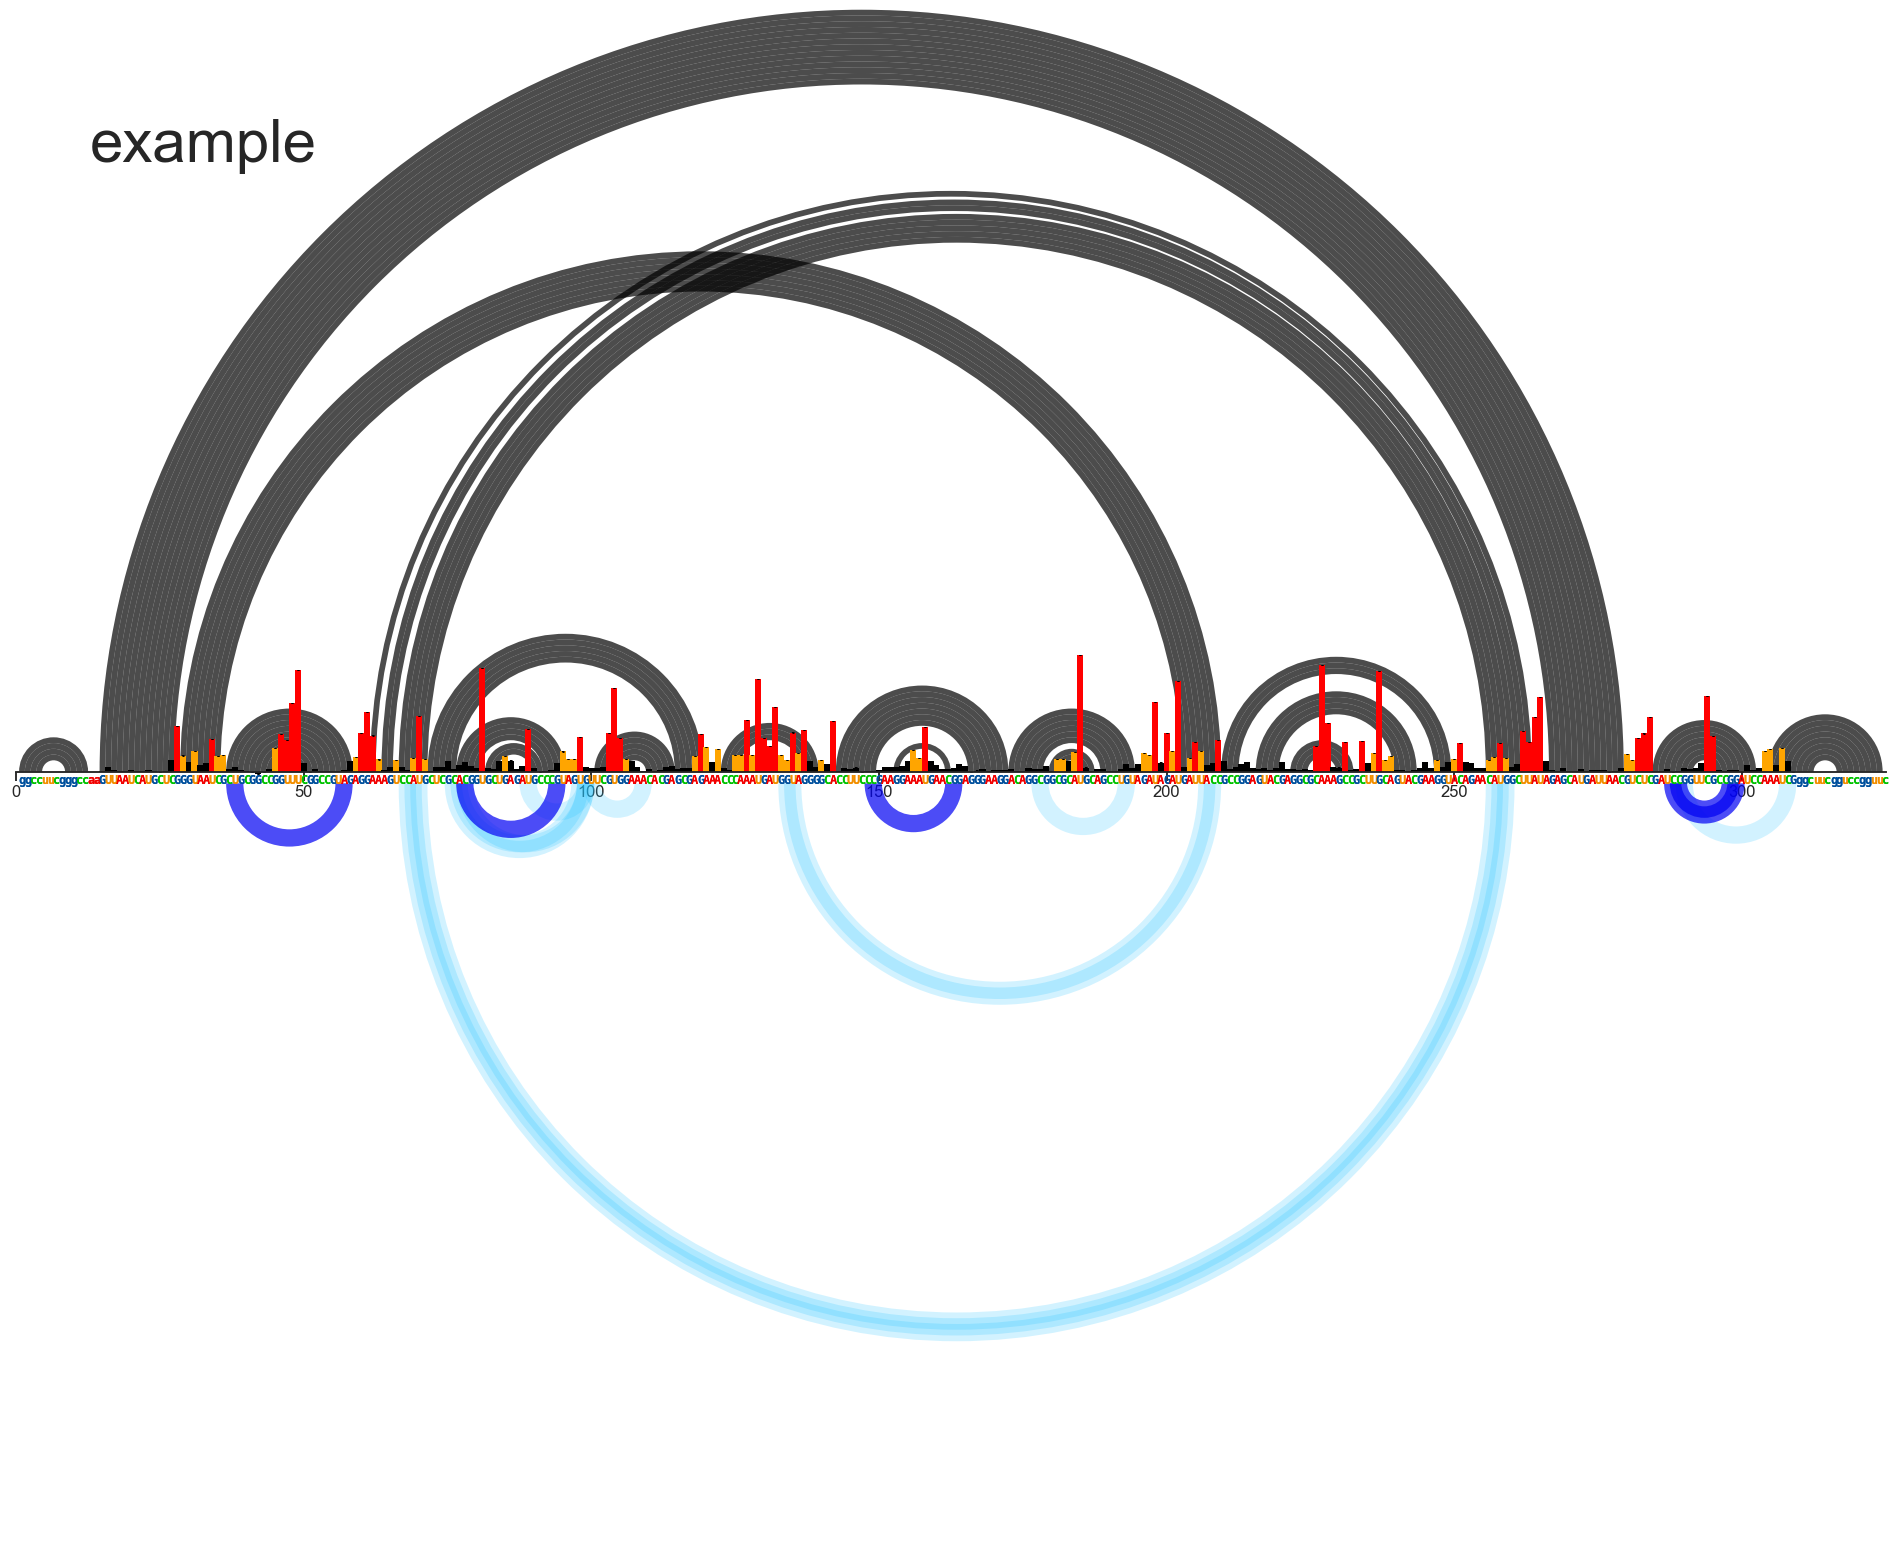

In [7]:
example.make_ap(type="pairs")

Secondary Structure
-------------------

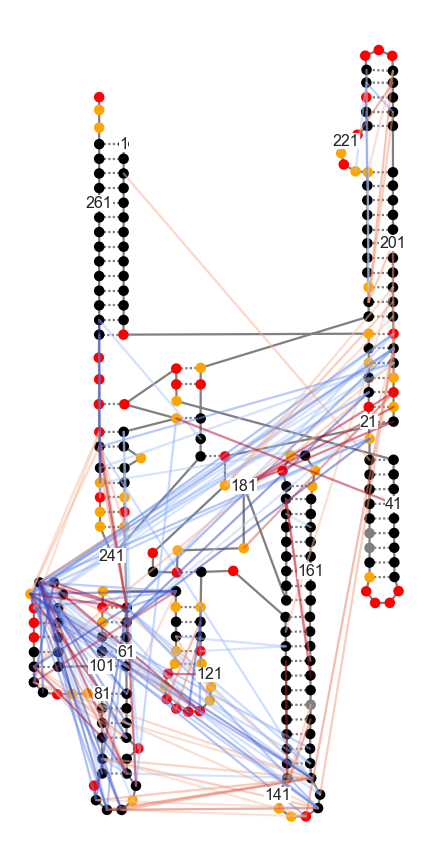

In [8]:
example.make_ss()